In [290]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import itertools

import seaborn as sns

sns.set_style('darkgrid')

from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=True)

In [291]:
pd.set_option('display.max_columns', None)

## Data Import

In [292]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [293]:
leads.shape

(9240, 37)

In [294]:
leads['Lead Number'].nunique()

9240

In [14]:
leads['Lead Number'].nunique() == len(leads)

True

In [295]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Data Cleaning

### Missing values treatment

In [296]:
def get_missing_report(leads):
    missing_leads = (leads.isnull().sum()/len(leads)).rename_axis('columns').to_frame('missing_perc').reset_index()
    missing_leads['type'] = missing_leads['columns'].apply(lambda col: str(leads[col].dtypes))
    return missing_leads.sort_values(by = 'missing_perc', ascending=False)

In [297]:
missing_leads = get_missing_report(leads)
missing_leads

,columns,missing_perc,type
25,Lead Quality,0.515909,object
30,Asymmetrique Activity Index,0.456494,object
33,Asymmetrique Profile Score,0.456494,float64
32,Asymmetrique Activity Score,0.456494,float64
31,Asymmetrique Profile Index,0.456494,object
24,Tags,0.362879,object
28,Lead Profile,0.293182,object
15,What matters most to you in choosing a course,0.293182,object
14,What is your current occupation,0.291126,object
11,Country,0.266342,object


In [ ]:
# Drop Lead Quality column (More than 50% missing value)


In [156]:
numerical_missing_cols = list(missing_leads[(missing_leads['missing_perc'] > 0) & ((missing_leads['type'] == 'float64'))]['columns'])
print(numerical_missing_cols)
non_numerical_missing_cols = list(missing_leads[(missing_leads['missing_perc'] > 0) & ((missing_leads['type'] == 'object'))]['columns'])
print(non_numerical_missing_cols)

['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Page Views Per Visit', 'TotalVisits']
['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Tags', 'Lead Profile', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country', 'How did you hear about X Education', 'Specialization', 'City', 'Last Activity', 'Lead Source']


In [135]:
def plot_distribution(leads, cols):
    for col in cols:
        plt.figure(figsize=(8,8))
        plt.title('%s distribution' %col)
        sns.distplot(leads[col], bins=30)
        plt.show()

In [136]:
def plot_distribution_log(leads, cols):
    for col in cols:
        plt.figure(figsize=(8,8))
        plt.title('%s distribution' %col)
        sns.distplot(leads[col], bins=30)
        plt.yscale('log')
        plt.show()

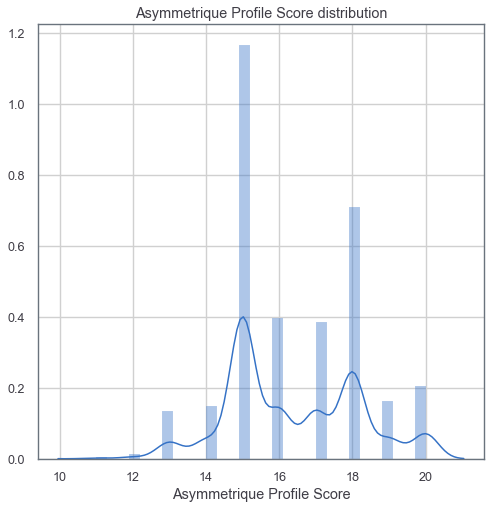

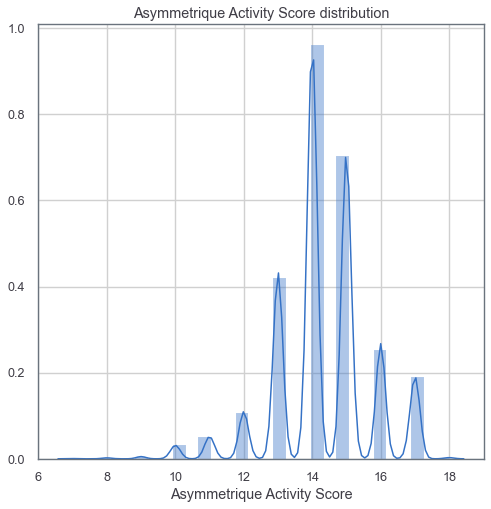

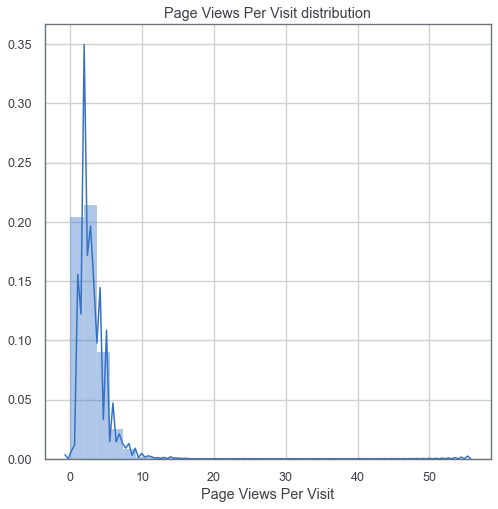

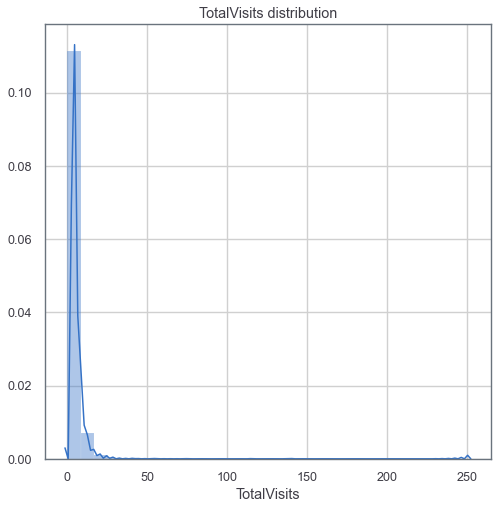

In [11]:
#distribution plot of numeric missing columns
plot_distribution(leads, numerical_missing_cols)

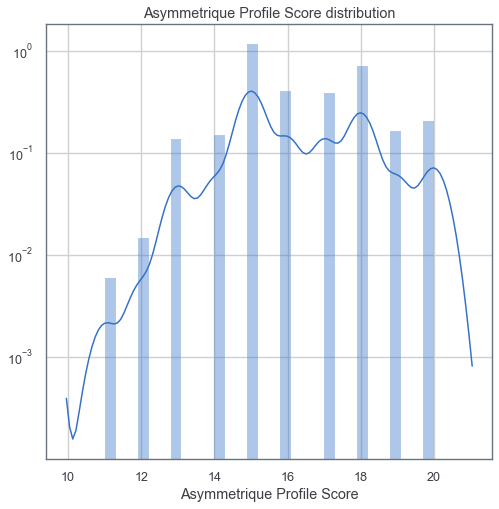

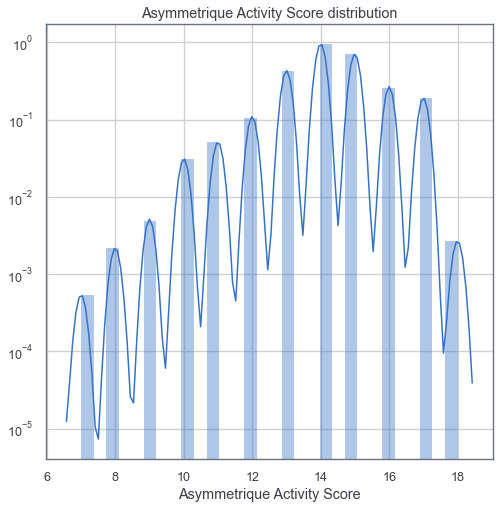

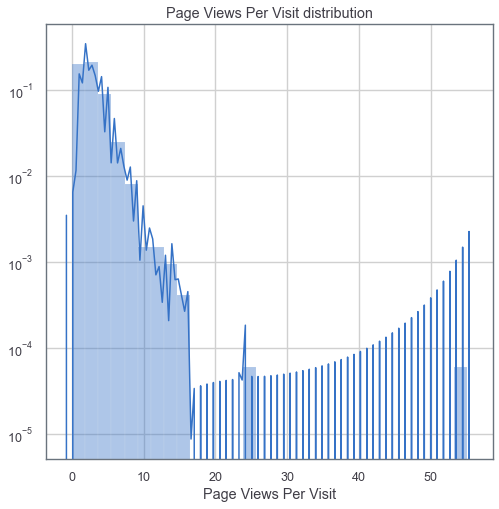

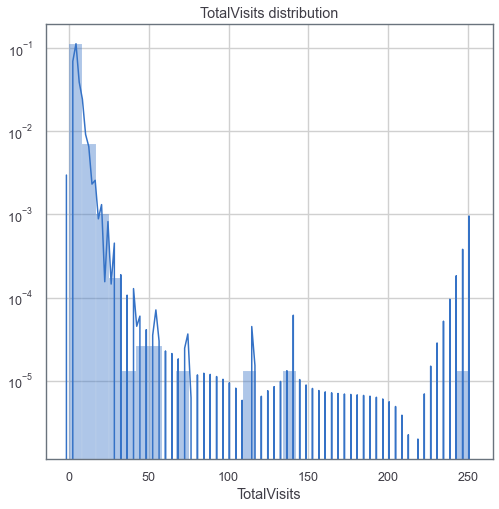

In [49]:
plot_distribution_log(leads,numerical_missing_cols)

In [137]:
leads[numerical_missing_cols].describe(percentiles=[0.75,0.95,0.97,0.99])

,Asymmetrique Profile Score,Asymmetrique Activity Score,Page Views Per Visit,TotalVisits
count,5022.000000,5022.000000,9103.000000,9103.000000
mean,16.344883,14.306252,2.362820,3.445238
std,1.811395,1.386694,2.161418,4.854853
min,11.000000,7.000000,0.000000,0.000000
50%,16.000000,14.000000,2.000000,3.000000
75%,18.000000,15.000000,3.000000,5.000000
95%,20.000000,17.000000,6.000000,10.000000
97%,20.000000,17.000000,7.000000,11.000000
99%,20.000000,17.000000,9.000000,17.000000
max,20.000000,18.000000,55.000000,251.000000


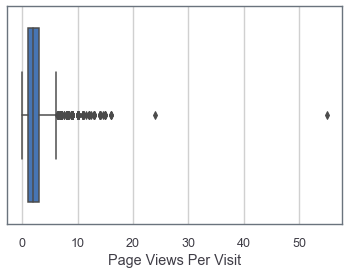

In [51]:
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

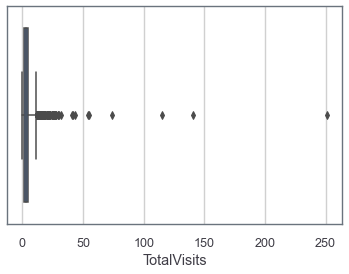

In [52]:
sns.boxplot(leads['TotalVisits'])
plt.show()

- From the above statistics and visualizations. We should impute the missing values for 'Page Views Per Visit' and 'TotalVisits' as 75 percentile value

 Asymmetric Profile Score and Asymmetric Activity Score 

In [157]:
# Imputing the null values for these 2 variables with 0 in order to check the distribution for converted and not converted
leads[['Asymmetrique Profile Score','Asymmetrique Activity Score']] = leads[['Asymmetrique Profile Score','Asymmetrique Activity Score']].fillna(0)

In [115]:
def count_plot_missing(leads, cols):
    for col in cols[0:2]:
        plt.figure(figsize=(8,8))
        plt.title('%s distribution' %col)
        sns.countplot(leads[col],hue = leads['Converted'])
        plt.show()

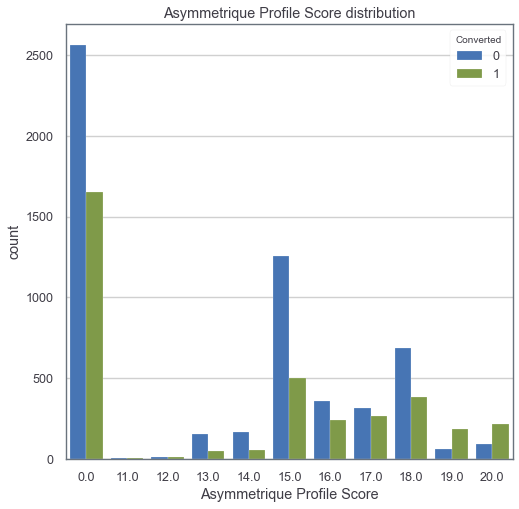

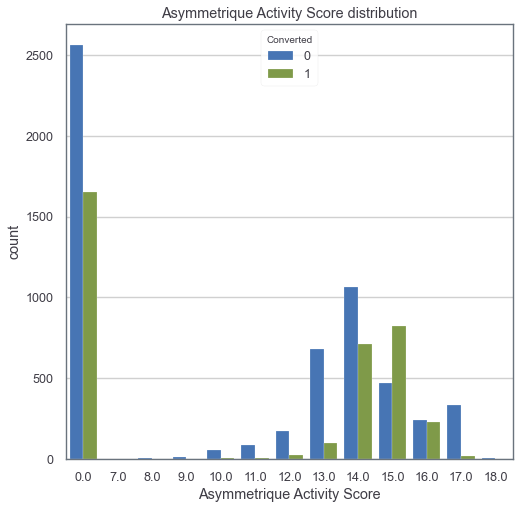

In [57]:
count_plot_missing(leads,numerical_missing_cols)

In [58]:
leads.groupby('Asymmetrique Activity Score')['Converted'].mean()

Asymmetrique Activity Score
0.0     0.391892
7.0     0.000000
8.0     0.000000
9.0     0.000000
10.0    0.052632
11.0    0.073684
12.0    0.117347
13.0    0.126452
14.0    0.400903
15.0    0.635731
16.0    0.488223
17.0    0.048711
18.0    0.000000
Name: Converted, dtype: float64

In [59]:
leads.groupby('Asymmetrique Profile Score')['Converted'].mean()

Asymmetrique Profile Score
0.0     0.391892
11.0    0.555556
12.0    0.454545
13.0    0.235294
14.0    0.252212
15.0    0.284252
16.0    0.405676
17.0    0.452504
18.0    0.357610
19.0    0.742857
20.0    0.707792
Name: Converted, dtype: float64

- For 'Asymmetric Activity Score' similar behaviour is closest for Null(0) and 14 score.That's why the null values should be imputed with 14(which happens to be the median).
- For 'Asymmetric Profile Score' similar behaviour is closest for Null(0) and 16 score.That's why the null values should be imputed with 16(which happens to be the median).

### Imputing Missing values for Numerical missing columns

Asymmetric Profile Score and Asymmetric Activity Score

In [158]:
for col in numerical_missing_cols[0:2]:
    median_val_col = leads[col].median()
    leads.loc[leads[col] == 0,col] = median_val_col

Page Views Per Visit and TotalVisits

In [159]:
for col in numerical_missing_cols[2:]:
    quater_val_col = leads[col].quantile(0.75)
    leads[col] = leads[col].fillna(quater_val_col)

In [160]:
leads[numerical_missing_cols].describe()

,Asymmetrique Profile Score,Asymmetrique Activity Score,Page Views Per Visit,TotalVisits
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,15.274459,13.709957,2.372267,3.468290
std,1.774126,1.211782,2.146715,4.822386
min,11.000000,7.000000,0.000000,0.000000
25%,14.000000,13.000000,1.000000,1.000000
50%,14.000000,13.000000,2.000000,3.000000
75%,16.000000,14.000000,3.000000,5.000000
max,20.000000,18.000000,55.000000,251.000000


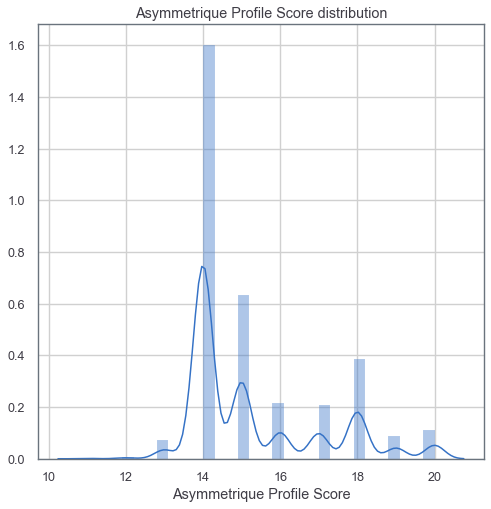

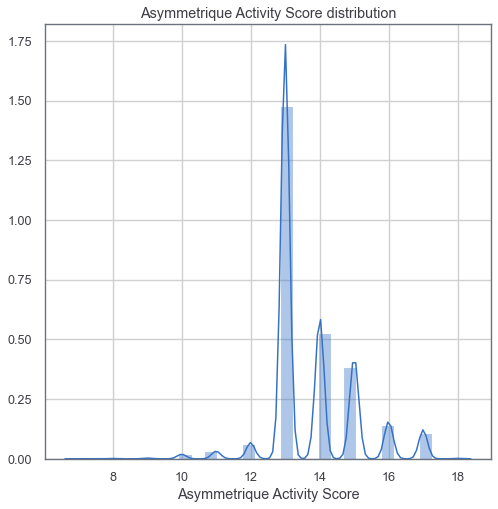

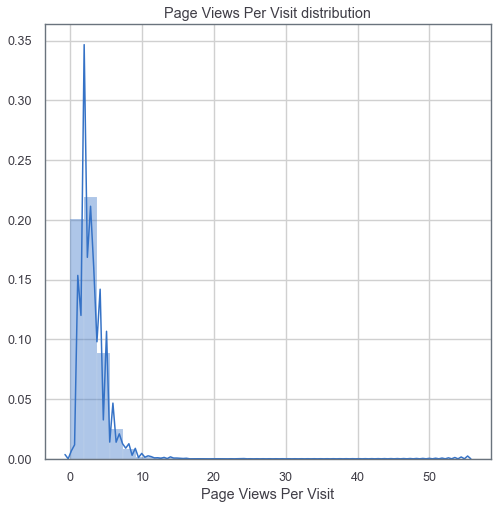

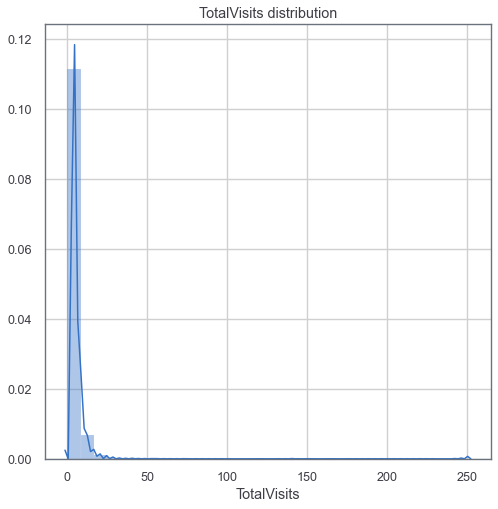

In [66]:
plot_distribution(leads, numerical_missing_cols)

### Non numerical missing columns

In [161]:
non_numerical_missing_cols

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Tags',
 'Lead Profile',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'How did you hear about X Education',
 'Specialization',
 'City',
 'Last Activity',
 'Lead Source']

Asymmetrique Activity Index and Asymmetrique Profile Index

In [162]:
leads.loc[leads['Asymmetrique Activity Score'] == 14,'Asymmetrique Activity Index'].unique()

array(['02.Medium'], dtype=object)

In [163]:
leads['Asymmetrique Activity Index'] = leads['Asymmetrique Activity Index'].fillna('02.Medium')

In [164]:
leads.loc[leads['Asymmetrique Profile Score'] == 16,'Asymmetrique Profile Index'].unique()

array(['02.Medium'], dtype=object)

In [165]:
leads['Asymmetrique Profile Index'] = leads['Asymmetrique Profile Index'].fillna('02.Medium')

In [166]:
non_numerical_missing_cols.pop(1)
non_numerical_missing_cols.pop(1)

'Asymmetrique Profile Index'

In [167]:
non_numerical_missing_cols

['Lead Quality',
 'Tags',
 'Lead Profile',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'How did you hear about X Education',
 'Specialization',
 'City',
 'Last Activity',
 'Lead Source']

In [168]:
missing_leads = get_missing_report(leads)
missing_leads[(missing_leads['missing_perc'] > 0)]

,columns,missing_perc,type
25,Lead Quality,0.515909,object
24,Tags,0.362879,object
28,Lead Profile,0.293182,object
15,What matters most to you in choosing a course,0.293182,object
14,What is your current occupation,0.291126,object
11,Country,0.266342,object
13,How did you hear about X Education,0.238853,object
12,Specialization,0.155628,object
29,City,0.153680,object
10,Last Activity,0.011147,object


Columns with Select(eqivalent to NULL) value

- Specialization - Select

- How did you hear about X Education - Select

- Lead Profile - Select

In [170]:
#Replacing all the NULL values with 'Select' as it is equivalent to NULL
leads['Specialization'] = leads['Specialization'].fillna('Select')
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].fillna('Select')
leads['Lead Profile'] = leads['Lead Profile'].fillna('Select')

In [171]:
missing_leads = get_missing_report(leads)
missing_leads[(missing_leads['missing_perc'] > 0)]

,columns,missing_perc,type
25,Lead Quality,0.515909,object
24,Tags,0.362879,object
15,What matters most to you in choosing a course,0.293182,object
14,What is your current occupation,0.291126,object
11,Country,0.266342,object
29,City,0.153680,object
10,Last Activity,0.011147,object
3,Lead Source,0.003896,object


In [172]:
# Filling rest other missing values with 'missing' category
leads = leads.fillna('missing')

In [173]:
for col in non_numerical_missing_cols:
    print(leads.groupby(col)['Converted'].mean())

Lead Quality
High in Relevance    0.946625
Low in Relevance     0.818182
Might be             0.755769
Not Sure             0.243590
Worst                0.019967
missing              0.214810
Name: Converted, dtype: float64
Tags
Already a student                                    0.006452
Busy                                                 0.564516
Closed by Horizzon                                   0.994413
Diploma holder (Not Eligible)                        0.015873
Graduation in progress                               0.063063
In confusion whether part time or DLP                0.200000
Interested  in full time MBA                         0.025641
Interested in Next batch                             1.000000
Interested in other courses                          0.025341
Lateral student                                      1.000000
Lost to EINS                                         0.977143
Lost to Others                                       0.000000
Not doing further educatio

Imputable Categorical Columns for NULL values for now is:
1. Tags - in touch with EINS(25% conversion rate)
2. Country - Singapore(46% conversion rate(44% for 'missing'))
3. Last Activity - Had a Phone Conversation(73% conversion rate(78% for 'missing))
4. Lead Quality - Not Sure (24% conversion rate(21% for 'missing')
5. Specialization - Services Excellence (28%(29% for 'Select'))
6. Lead Source - Click2call(75%(80% for 'missing'))
7. How did you hear about X Education - Multiple Sources(37% for 'Select' too)

Lead Profile??

In [174]:
#Imputing Categorical variables
leads.loc[leads['Tags'] == 'missing','Tags'] = 'in touch with EINS' 
leads.loc[leads['Country'] == 'missing','Country'] = 'Singapore' 
leads.loc[leads['Last Activity'] == 'missing','Last Activity'] = 'Had a Phone Conversation'
leads.loc[leads['Lead Quality'] == 'missing','Lead Quality'] = 'Not Sure'
leads.loc[leads['Specialization'] == 'Select','Specialization'] = 'Services Excellence'
leads.loc[leads['Lead Source'] == 'missing','Lead Source'] = 'Click2call'
leads.loc[leads['How did you hear about X Education'] == 'Select','How did you hear about X Education'] = ' Multiple Sources'

In [175]:
missing_leads = get_missing_report(leads)
missing_leads

,columns,missing_perc,type
0,Prospect ID,0.0,object
19,X Education Forums,0.0,object
21,Digital Advertisement,0.0,object
22,Through Recommendations,0.0,object
23,Receive More Updates About Our Courses,0.0,object
24,Tags,0.0,object
25,Lead Quality,0.0,object
26,Update me on Supply Chain Content,0.0,object
27,Get updates on DM Content,0.0,object
28,Lead Profile,0.0,object


### Separate numerical and categorical columns

In [176]:
numerical_cols = []
categorical_cols = []

for col in missing_leads['columns']:
    col_type = missing_leads[missing_leads['columns'] == col]['type'].values[0]
    if col_type == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [177]:
numerical_cols

['Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [178]:
categorical_cols

['Prospect ID',
 'X Education Forums',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Newspaper',
 'Newspaper Article',
 'Magazine',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Last Notable Activity']

In [105]:
len(leads)

9240

In [106]:
leads['Prospect ID'].nunique()

9240

In [107]:
leads['Lead Number'].nunique()

9240

### Further cleaning

Drop - Magazine - All values are same (No)

Drop - Receive More Updates About Our Courses - All values are same (No)

Drop - Update me on Supply Chain Content - All values are same (No)

Drop - Get updates on DM Content - All values are same (No)

Drop - City - Wrong values present (doesnt match with country)

Drop - I agree to pay the amount through cheque - All values are same (No)

In [179]:
cols_to_drop = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
               'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque']

leads.drop(cols_to_drop, axis=1, inplace=True)

In [180]:
leads_cleaned = leads.drop(['Prospect ID', 'Lead Number'], axis=1)

In [181]:
leads_cleaned.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [28]:
len(leads_cleaned[leads_cleaned['Country'] == 'unknown'])/len(leads_cleaned)

0.0005411255411255411

In [194]:
leads_cleaned.groupby('Country')['Converted'].mean()

Country
Asia/Pacific Region     0.500000
Australia               0.230769
Bahrain                 0.571429
Bangladesh              0.500000
Belgium                 0.000000
Canada                  0.000000
China                   0.000000
Denmark                 1.000000
France                  0.500000
Germany                 0.250000
Ghana                   0.000000
Hong Kong               0.571429
India                   0.369840
Indonesia               0.000000
Italy                   0.000000
Kenya                   0.000000
Kuwait                  0.000000
Liberia                 0.000000
Malaysia                0.000000
Netherlands             0.500000
Nigeria                 0.000000
Oman                    0.500000
Philippines             0.000000
Qatar                   0.100000
Russia                  0.000000
Saudi Arabia            0.190476
Singapore               0.437425
South Africa            0.250000
Sri Lanka               0.000000
Sweden                  0.333333
Sw

- 20% Conversion rate for Unknown Countries(Better not to remove them)

In [182]:
# No need to drop now
#indices_to_drop = leads[leads['Country'] == 'unknown'].index
#leads.drop(indices_to_drop, inplace=True)

In [184]:
len(leads_cleaned)

9240

In [185]:
leads_cleaned.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Singapore,Services Excellence,Multiple Sources,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Services Excellence,Multiple Sources,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Multiple Sources,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Services Excellence,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,02.Medium,01.High,15.0,18.0,No,Modified


## Exploratory Data Analysis

### Univarate Analysis of Numerical Columns and Outlier Analysis

In [219]:
numerical_cols

['Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [220]:
# Removing 'Lead Number' and Target column from the analysis
numerical_cols.remove('Lead Number')
target_col = 'Converted'
numerical_cols.remove('Converted')

In [221]:
numerical_cols

['Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [222]:
#'Asymmetrique Activity Score','Asymmetrique Profile Score' being not continues numerical variables that's why removing them
numerical_cols.remove('Asymmetrique Activity Score')
numerical_cols.remove('Asymmetrique Profile Score')

In [223]:
numerical_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [232]:
def box_plot(df, cols):
    for col in cols:
        plt.figure(figsize=(8,8))
        #subplot 1
        plt.subplot(1,2,1)
        plt.title('%s boxplot' %col)
        sns.boxplot(y=df[col])
        #subplot 2
        plt.subplot(1,2,2)
        #plt.title('Converted'+' '+'%s boxplot' %col)
        sns.boxplot(x = df['Converted'],y=df[col])
        plt.show()

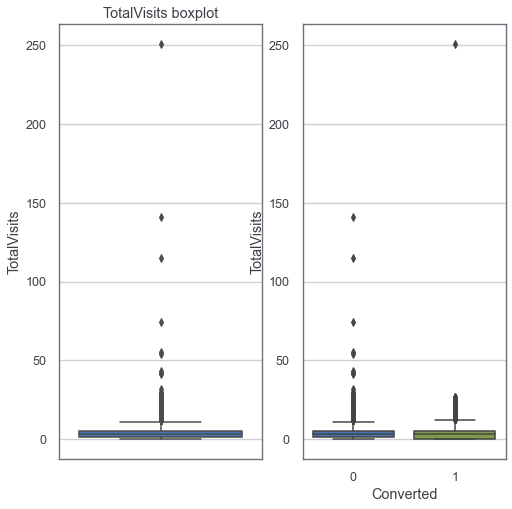

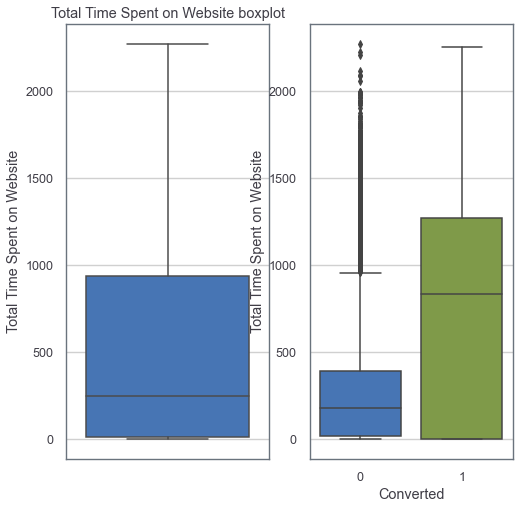

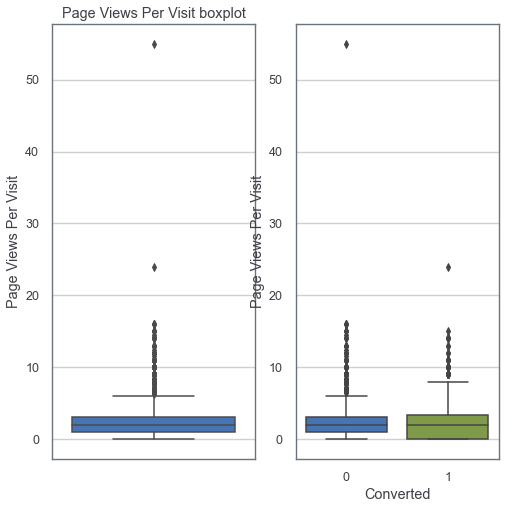

In [233]:
box_plot(leads_cleaned,numerical_cols)

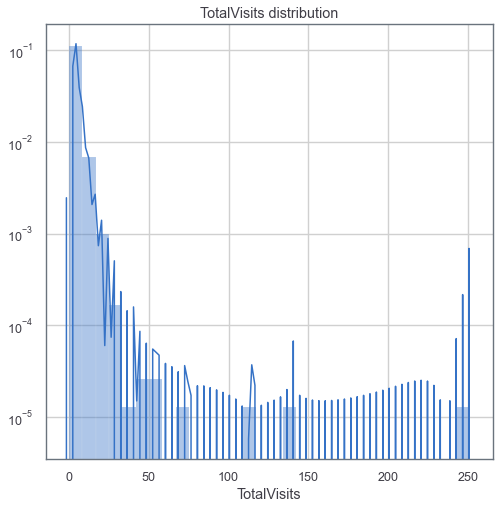

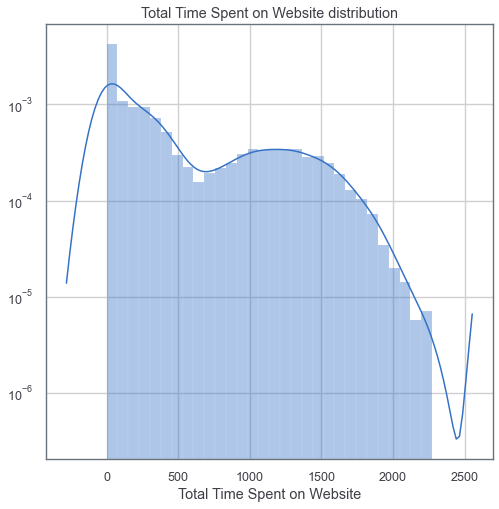

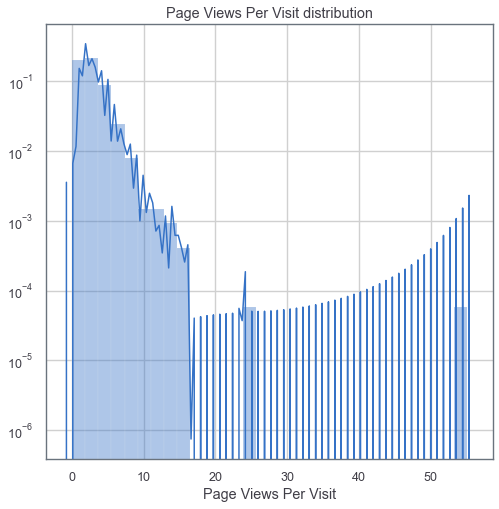

In [237]:
plot_distribution_log(leads_cleaned,numerical_cols)

In [236]:
leads_cleaned[numerical_cols].describe(percentiles = [0.25,0.75,0.95,0.97,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.468290,487.698268,2.372267
std,4.822386,548.021466,2.146715
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
95%,10.000000,1562.000000,6.000000
97%,11.000000,1660.000000,7.000000
99%,17.000000,1840.610000,9.000000


From the above Analysis in order to remove the Outliers keeping in mind about the Target variable it's best to keep
1. Total Visits - Upper limit as 50
2. Total Time Spent on Website - No need for removing outliers
3. Page Views Per Visit - Upper limit as 30

In [238]:
# Removing Outliers
leads_cleaned_new = leads_cleaned[leads_cleaned['TotalVisits'] <= 50]
leads_cleaned_new = leads_cleaned_new[leads_cleaned_new['Page Views Per Visit'] <= 30]

In [240]:
leads_cleaned_new[numerical_cols].describe(percentiles = [0.25,0.75,0.95,0.97,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9234.000000,9234.000000,9234.000000
mean,3.395820,487.606130,2.364254
std,3.482846,548.047472,2.072268
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
95%,9.000000,1562.000000,6.000000
97%,11.000000,1660.020000,7.000000
99%,16.670000,1840.670000,9.000000


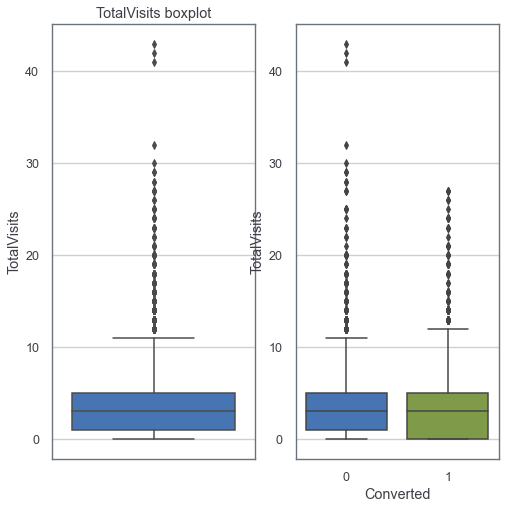

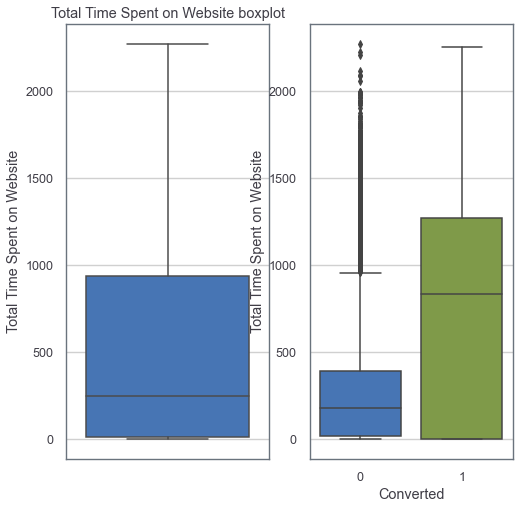

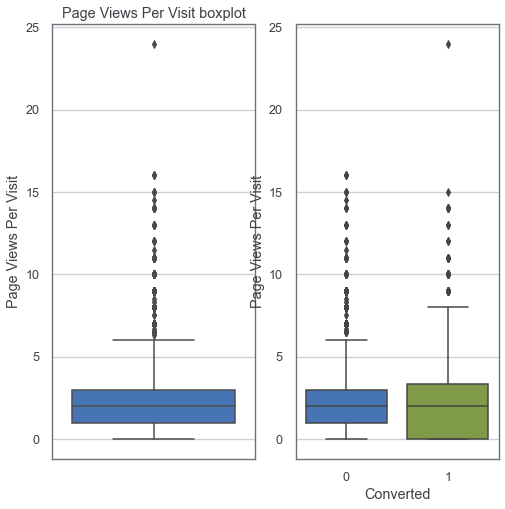

In [241]:
box_plot(leads_cleaned_new,numerical_cols)

In [289]:
len(leads_cleaned_new)

9234

### Univariate Analysis for Categorical Variables

In [243]:
categorical_cols

['Prospect ID',
 'X Education Forums',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Newspaper',
 'Newspaper Article',
 'Magazine',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Last Notable Activity']

In [244]:
categorical_cols.remove('Prospect ID')

In [248]:
cols_to_drop

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque']

In [249]:
categorical_cols = [e for e in categorical_cols if e not in cols_to_drop]

In [250]:
categorical_cols

['X Education Forums',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'A free copy of Mastering The Interview',
 'Newspaper',
 'Newspaper Article',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Last Notable Activity']

In [253]:
#palette = itertools.cycle(sns.color_palette())
def bar_plot(x,df, title, figsize=(10,10), tight_layout=False):
    #c = next(palette)
    plt.figure(figsize=figsize)
    #subplot 1
    plt.subplot(2,1,1)
    plt.title(title)
    percentage_counts = (df[x].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
    sns.barplot(x = 'index', y='percentage',data= percentage_counts)
    #subplot 2
    plt.subplot(2,1,2)
    converted_df = pd.DataFrame(df.groupby(x)['Converted'].mean()).reset_index()
    converted_df = converted_df.sort_values('Converted',ascending = False)
    sns.barplot(x,y='Converted',data = converted_df)
    plt.title('Conversion'+" " + title)
    plt.tight_layout()
    if tight_layout:
        plt.xticks(rotation=45)
    plt.show()

In [262]:
def count_plot(x,df,title, figsize=(10,5), tight_layout=False):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.countplot(df[x])
    plt.tight_layout()
    if tight_layout:
        plt.xticks(rotation=45)
    plt.show()

In [ ]:
def count_plot_converted(x, df,title, figsize=(10,5), tight_layout=False):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.countplot(x,hue=df['Converted'])
    plt.tight_layout()
    if tight_layout:
        plt.xticks(rotation=45)
    plt.show()

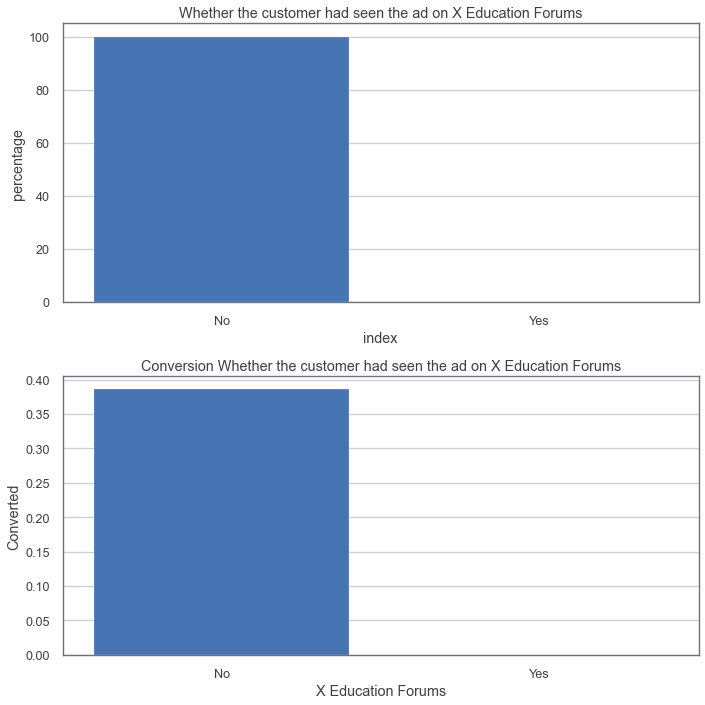

In [255]:
# X education Forums
bar_plot('X Education Forums',leads_cleaned_new,'Whether the customer had seen the ad on X Education Forums')

- X Education forums is not a good variable due to high imbalance in Data. Can be dropped for Model Building

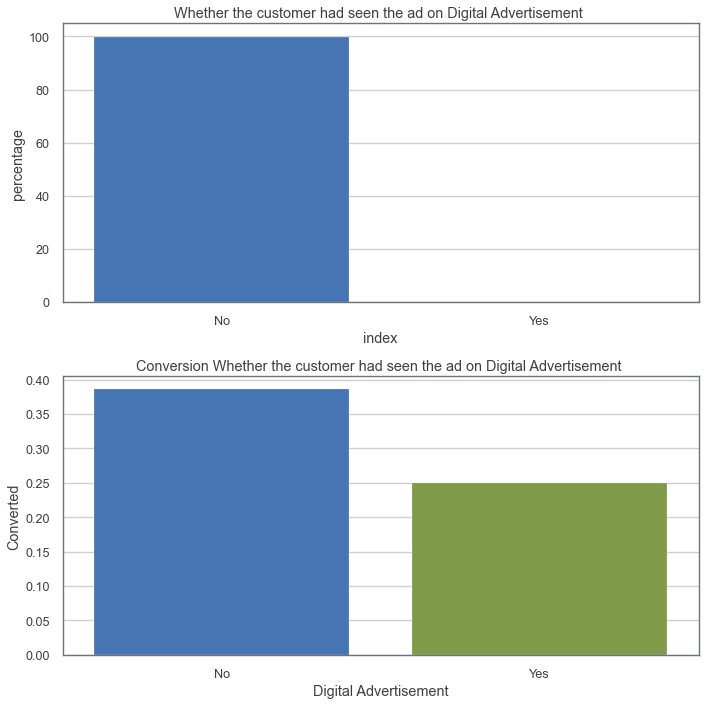

In [256]:
bar_plot('Digital Advertisement',leads_cleaned_new,'Whether the customer had seen the ad on Digital Advertisement ')

- Not Good for Model Building.

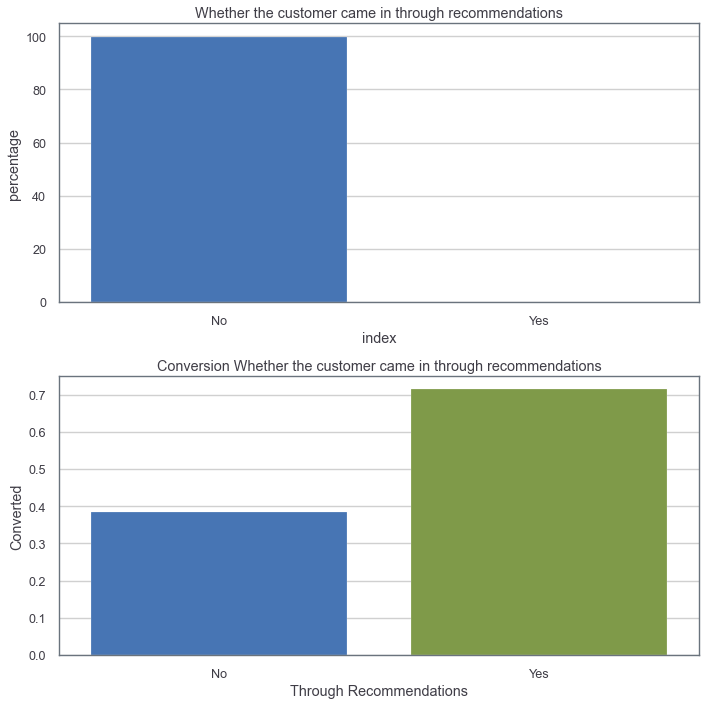

In [257]:
bar_plot('Through Recommendations',leads_cleaned_new,'Whether the customer came in through recommendations')

In [271]:
tags_list

['in touch with EINS',
 'Will revert after reading the email',
 'Ringing',
 'Interested in other courses',
 'Already a student']

In [269]:
percentage_counts

,index,percentage
0,in touch with EINS,36.398094
1,Will revert after reading the email,22.438813
2,Ringing,13.027940
3,Interested in other courses,5.544726
4,Already a student,5.035737


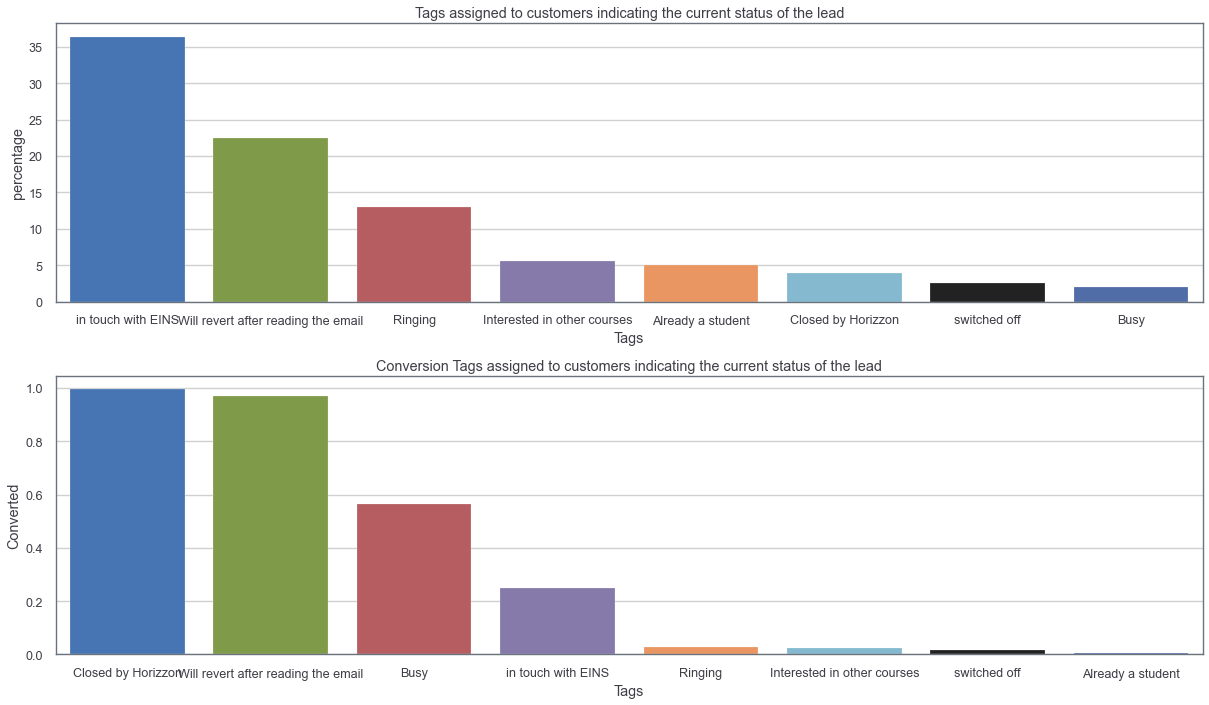

In [288]:
title = 'Tags assigned to customers indicating the current status of the lead'
plt.figure(figsize=(17,10))
tight_layout=False
#subplot 1
plt.subplot(2,1,1)
plt.title(title)
percentage_counts = (leads_cleaned_new['Tags'].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
percentage_counts = percentage_counts[percentage_counts['percentage'] > 2]
percentage_counts.columns = ['Tags','percentage']
sns.barplot(x = 'Tags', y='percentage',data= percentage_counts)
#subplot 2
plt.subplot(2,1,2)
tags_list =[] 
tags_list = percentage_counts['Tags'].to_list() 
converted_df = pd.DataFrame(leads_cleaned_new.groupby('Tags')['Converted'].mean()).reset_index()
converted_df = converted_df.sort_values('Converted',ascending = False)
converted_df = converted_df[converted_df['Tags'].isin(tags_list)]
sns.barplot('Tags',y='Converted',data = converted_df)
plt.title('Conversion'+" " + title)
plt.tight_layout()
if tight_layout:
    plt.xticks(rotation=45)
plt.show()